# Belajar pandas

# #01: Menyertakan prefix dan suffix pada kolom data frame

In [2]:
import pandas as pd
import numpy as np

print(pd.__version__)
print(np.__version__)

1.3.3
1.21.2


In [3]:
# Persiapan data frame
n_rows = 5
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1,10, size=(n_rows, n_cols)), columns=cols)
df

,A,B,C,D,E
0,5,6,1,4,6
1,1,9,3,9,7
2,9,5,1,3,7
3,5,9,2,6,8
4,7,5,8,4,1


In [4]:
tuple('ABCDE')

('A', 'B', 'C', 'D', 'E')

In [5]:
# Menyertakan prefix kolom
df.add_prefix('kolom_')

,kolom_A,kolom_B,kolom_C,kolom_D,kolom_E
0,5,6,1,4,6
1,1,9,3,9,7
2,9,5,1,3,7
3,5,9,2,6,8
4,7,5,8,4,1


In [6]:
#Menyertakan sufix kolom
df.add_suffix('_field')

,A_field,B_field,C_field,D_field,E_field
0,5,6,1,4,6
1,1,9,3,9,7
2,9,5,1,3,7
3,5,9,2,6,8
4,7,5,8,4,1


# #02: Pemilihan baris (rows selection) pada data frame

In [7]:
# Persiapan data frame
n_rows = 10
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1,5, size=(n_rows, n_cols)), columns=cols)
df

,A,B,C,D,E
0,4,1,1,4,1
1,2,1,2,1,3
2,4,3,2,2,3
3,3,1,2,1,3
4,3,3,4,1,1
5,4,3,3,2,3
6,4,2,1,4,3
7,3,1,4,3,2
8,3,1,2,1,3
9,2,4,1,4,3


In [8]:
# Selection dengan operator logika | (or)
df[(df['A'] == 1) | (df['A'] == 3)]

,A,B,C,D,E
3,3,1,2,1,3
4,3,3,4,1,1
7,3,1,4,3,2
8,3,1,2,1,3


In [9]:
# Selection dengan fungsi isin()
df[df['A'].isin([1,3])]

,A,B,C,D,E
3,3,1,2,1,3
4,3,3,4,1,1
7,3,1,4,3,2
8,3,1,2,1,3


In [10]:
# Mengenal operator negasi ~
df[~df['A'].isin([1,3])]

,A,B,C,D,E
0,4,1,1,4,1
1,2,1,2,1,3
2,4,3,2,2,3
5,4,3,3,2,3
6,4,2,1,4,3
9,2,4,1,4,3


# #03: Konversi tipe data string ke numerik pada kolom data frame

In [11]:
# Persiapan data frame
data = {'col1':['1','2','3','teks'],
        'col2':['1','2','3','4']}

df=pd.DataFrame(data)
df

,col1,col2
0,1,1
1,2,2
2,3,3
3,teks,4


In [12]:
df.dtypes

col1    object
col2    object
dtype: object

In [13]:
# konversi tipe data dengan fungsi astype()
df_x = df.astype({'col2':'int64'})
df_x

,col1,col2
0,1,1
1,2,2
2,3,3
3,teks,4


In [14]:
df_x.dtypes

col1    object
col2     int64
dtype: object

In [15]:
# Konversi tipe data numerik dengan fungsi to_numeric()
df.apply(pd.to_numeric, errors ='coerce')

,col1,col2
0,1.0,1
1,2.0,2
2,3.0,3
3,NaN,4


# #04: Pemiliihan kolom (columns selection) pada pandas data frame berdasarkan tipe data

In [16]:
# Persiapan data frame
n_rows = 5
n_cols = 2
cols = ['bil_pecahan','bil_bulat']

df = pd.DataFrame(np.random.randint(1,20,size=(n_rows, n_cols)), columns=cols)
df['bil_pecahan']=df['bil_pecahan'].astype('float')

df.index=pd.util.testing.makeDateIndex(n_rows, freq='H')
df=df.reset_index()

df['teks']=list('ABCDE')

df

C:\Users\yulio\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\util\__init__.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing


,index,bil_pecahan,bil_bulat,teks
0,2000-01-01 00:00:00,9.0,6,A
1,2000-01-01 01:00:00,6.0,6,B
2,2000-01-01 02:00:00,12.0,15,C
3,2000-01-01 03:00:00,9.0,11,D
4,2000-01-01 04:00:00,2.0,18,E


In [17]:
df.dtypes

index          datetime64[ns]
bil_pecahan           float64
bil_bulat               int32
teks                   object
dtype: object

In [18]:
# memilih kolom bertipe data numerik
df.select_dtypes(include='number')

,bil_pecahan,bil_bulat
0,9.0,6
1,6.0,6
2,12.0,15
3,9.0,11
4,2.0,18


In [19]:
df.select_dtypes(include='float')

,bil_pecahan
0,9.0
1,6.0
2,12.0
3,9.0
4,2.0


In [20]:
df.select_dtypes(include='int')

,bil_bulat
0,6
1,6
2,15
3,11
4,18


In [21]:
# Memilih kolom bertipe data string atau object
df.select_dtypes(include='object')

,teks
0,A
1,B
2,C
3,D
4,E


In [22]:
# Memilih kolom bertipe data datetime
df.select_dtypes(include='datetime')

,index
0,2000-01-01 00:00:00
1,2000-01-01 01:00:00
2,2000-01-01 02:00:00
3,2000-01-01 03:00:00
4,2000-01-01 04:00:00


In [23]:
# Memiliih kolom dengan kombinasi tipe data
df.select_dtypes(include=['number','object'])

,bil_pecahan,bil_bulat,teks
0,9.0,6,A
1,6.0,6,B
2,12.0,15,C
3,9.0,11,D
4,2.0,18,E


# #05: Membalik urutan baris dan kolom pada data frame

In [24]:
# Persiapan data frame
n_rows = 5
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1,10,size=(n_rows, n_cols)), columns=cols)
df

,A,B,C,D,E
0,1,8,6,1,9
1,5,6,2,5,8
2,5,4,3,8,9
3,4,6,9,3,3
4,3,6,6,6,2


In [25]:
# Membalik urutan kolom
df.loc[:, ::-1]

,E,D,C,B,A
0,9,1,6,8,1
1,8,5,2,6,5
2,9,8,3,4,5
3,3,3,9,6,4
4,2,6,6,6,3


In [26]:
# Membalik urutan baris
df.loc[::-1]

,A,B,C,D,E
4,3,6,6,6,2
3,4,6,9,3,3
2,5,4,3,8,9
1,5,6,2,5,8
0,1,8,6,1,9


In [27]:
# Membalik urutan baris dan melakukan penyesuaian ulang index
df.loc[::-1].reset_index(drop=True)

,A,B,C,D,E
0,3,6,6,6,2
1,4,6,9,3,3
2,5,4,3,8,9
3,5,6,2,5,8
4,1,8,6,1,9


# #06: Mengganti nama (label) kolom pada data frame

In [28]:
# Persiapan data frame
n_rows = 5
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1,10,size=(n_rows, n_cols)), columns=cols)
df

,A,B,C,D,E
0,4,3,9,7,8
1,9,7,4,5,7
2,2,1,8,8,2
3,5,4,4,9,3
4,7,5,7,2,9


In [29]:
# Mengganti nama (label) untuk sebuah kolom pada data frame
df.rename(columns={'C' : 'Hobi'})

,A,B,Hobi,D,E
0,4,3,9,7,8
1,9,7,4,5,7
2,2,1,8,8,2
3,5,4,4,9,3
4,7,5,7,2,9


In [30]:
# Mengganti nama (label) untuk banyak kolom pada data frame
df.rename(columns={'A':'Nama', 'B':'Alamat', 'D':'Kota'})

,Nama,Alamat,C,Kota,E
0,4,3,9,7,8
1,9,7,4,5,7
2,2,1,8,8,2
3,5,4,4,9,3
4,7,5,7,2,9


# #07: Menghapus missing values pada data frame (NaN)

In [31]:
# Persiapan data frame
df = pd.util.testing.makeMissingDataframe().reset_index() #formula untuk bikin dummy data dengan missing values
df.head()

,index,A,B,C,D
0,hdb1ItizIP,-0.705694,0.799022,-0.416829,-1.684422
1,5hzVj9Ulvb,NaN,NaN,1.746580,-0.271636
2,24DqTuSBEH,-0.389725,-0.418797,-0.782121,-0.011629
3,Bx5xeKIwqo,NaN,1.047372,-1.065659,1.496798
4,UPdXOYduK4,-0.437966,-0.411435,0.336525,0.740733


In [32]:
df = df.rename(columns={'index' : 'Z'})
df.head()

,Z,A,B,C,D
0,hdb1ItizIP,-0.705694,0.799022,-0.416829,-1.684422
1,5hzVj9Ulvb,NaN,NaN,1.746580,-0.271636
2,24DqTuSBEH,-0.389725,-0.418797,-0.782121,-0.011629
3,Bx5xeKIwqo,NaN,1.047372,-1.065659,1.496798
4,UPdXOYduK4,-0.437966,-0.411435,0.336525,0.740733


In [33]:
df_backup = df.copy(deep=True)

In [34]:
# Menghapus (drop) setiap kolom yang mengandung missing values
df = df.dropna(axis='columns')
df.head()

,Z
0,hdb1ItizIP
1,5hzVj9Ulvb
2,24DqTuSBEH
3,Bx5xeKIwqo
4,UPdXOYduK4


In [35]:
# Menghapus (drop) setiap baris yang mengandung missing values
df = df_backup.copy(deep=True)
df = df.dropna(axis='rows')
df.head()

,Z,A,B,C,D
0,hdb1ItizIP,-0.705694,0.799022,-0.416829,-1.684422
2,24DqTuSBEH,-0.389725,-0.418797,-0.782121,-0.011629
4,UPdXOYduK4,-0.437966,-0.411435,0.336525,0.740733
5,RbVC1hDuyE,-0.915875,0.054563,-1.639999,0.156392
6,CQzBFkvqYk,0.747963,-0.277709,0.594228,-0.634062


In [36]:
# Persentase missing values untuk tiap kolom
df = df_backup.copy(deep=True)
df.isna().mean()

Z    0.000000
A    0.133333
B    0.166667
C    0.066667
D    0.033333
dtype: float64

In [37]:
# Menghapus (drop) setiap kolom yang mengandung missing values berdasarkan treshold / ambang batas (presentase missing value)
treshold = len(df)*0.9
df = df.dropna(thresh=treshold, axis='columns')
df.head()

,Z,C,D
0,hdb1ItizIP,-0.416829,-1.684422
1,5hzVj9Ulvb,1.746580,-0.271636
2,24DqTuSBEH,-0.782121,-0.011629
3,Bx5xeKIwqo,-1.065659,1.496798
4,UPdXOYduK4,0.336525,0.740733


# #08: Memeriksa kesamaan antar kolom (series) pada data frame

In [38]:
# Persiapan data frame
data  = {'A':[15, 15, 18, np.nan, 12],'B':[15, 15, 18, np.nan, 12]}
df = pd.DataFrame(data)
df

,A,B
0,15.0,15.0
1,15.0,15.0
2,18.0,18.0
3,NaN,NaN
4,12.0,12.0


In [39]:
# Mengenal pandas series
# data frame merupakan kumpulan dari data series
df['A']

0    15.0
1    15.0
2    18.0
3     NaN
4    12.0
Name: A, dtype: float64

In [40]:
type(df['A'])

pandas.core.series.Series

In [41]:
type(df)

pandas.core.frame.DataFrame

In [42]:
# Memeriksa kesamaan dengan operator == (Tidak di rekomendasikan karena apabila dalam data teradap NaN maka akan tidak terbaca dengan baik)
df['A'] == df['B']

0     True
1     True
2     True
3    False
4     True
dtype: bool

In [43]:
# Memeriksa kesamaan dengan method equals() | Lebih di rekomendasikan
df['A'].equals(df['B'])

True

In [44]:
# Memeriksa kesamaan antar dua data frame
df1 = df.copy(deep=True)
df.equals(df1)

True

In [45]:
df == df1

,A,B
0,True,True
1,True,True
2,True,True
3,False,False
4,True,True


# #09: Membagi data frame menjadi dua secara acak

In [46]:
# Persiapan data frame
n_rows = 10
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1,20,size=(n_rows, n_cols)), columns=cols)
df

,A,B,C,D,E
0,3,14,4,13,11
1,14,2,17,17,1
2,12,2,12,3,5
3,17,5,16,18,1
4,16,3,5,19,17
5,7,4,2,13,3
6,6,3,1,2,12
7,10,10,11,10,15
8,3,11,6,11,5
9,3,3,18,17,5


In [47]:
# Membagi dua data frame menjadi dua secara acak berdasarkan proporsi tertentu
df.shape

(10, 5)

In [48]:
proporsi = 0.7
df_1 = df.sample(frac=proporsi)
df_2 = df.drop(df_1.index)

print(f'df_1 Shape: {df_1.shape}')
print(f'df_2 Shape: {df_2.shape}')

df_1 Shape: (7, 5)
df_2 Shape: (3, 5)


In [49]:
df_1

,A,B,C,D,E
3,17,5,16,18,1
9,3,3,18,17,5
2,12,2,12,3,5
6,6,3,1,2,12
0,3,14,4,13,11
1,14,2,17,17,1
5,7,4,2,13,3


In [50]:
df_2

,A,B,C,D,E
4,16,3,5,19,17
7,10,10,11,10,15
8,3,11,6,11,5


# #10: Mengganti nama (label) kolom pada data frame berdasarkan pola


In [51]:
# Persiapan data frame
df = pd.read_csv('./Dataset/titanicfull.csv')
df.columns = ['Pclass','Survival status','full Name','Sex ',' Age','Sib SP', 'parch','Ticket','Fare','Cabin','Embarked']
df_backup = df.copy(deep=True)
df.head()

,Pclass,Survival status,full Name,Sex,Age,Sib SP,parch,Ticket,Fare,Cabin,Embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


In [52]:
# Menggunakan lowercase untuk nama kolom dan mengganti spasi dengan _
df.columns = df.columns.str.replace(' ','_').str.lower()
df.head()

,pclass,survival_status,full_name,sex_,_age,sib_sp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


In [53]:
# Memangkas kelebihan spasi pada nama kolom
df = df_backup.copy(deep=True)
df.columns = df.columns.str.lower().str.strip().str.replace(' ','_') 
# Remark:
# str.lower() = merubah menjadi huruf kecil
# str.strip() = menghilangkan kelebihan sepasi di awal ataupun diakhir kata
# str.replace() = mengganti huruf
df.head()

,pclass,survival_status,full_name,sex,age,sib_sp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


# #11: Seleksi kolom dan baris pada data frame menggunakan loc

In [54]:
# Persiapan data frame
n_rows = 10
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1,20,size=(n_rows, n_cols)), columns=cols)
df

,A,B,C,D,E
0,12,6,16,6,12
1,2,14,12,11,4
2,3,2,18,17,7
3,5,2,7,5,1
4,19,14,7,3,12
5,2,12,2,11,1
6,4,6,8,9,12
7,11,12,17,8,4
8,14,14,13,16,8
9,17,2,15,14,10


In [55]:
# Seleksi kolom dan baris menggunakan loc
df.loc[[0,3,4],['B','E']] #bagian pertama untuk baris, bagian kedua untuk kolom


,B,E
0,6,12
3,2,1
4,14,12


In [56]:
# Seleksi baris dengan kondisi
df.loc[df['B']>10,['B','D','E']]

,B,D,E
1,14,11,4
4,14,3,12
5,12,11,1
7,12,8,4
8,14,16,8


In [57]:
# Slicing data frame dengan loc
df.loc[0:4, 'B':'D'] #slicing pada loc dataframe start dan End index sifatnya inclusif artinya angka tersebut di turut sertakan | Slicing list hanya start index say inclusive

,B,C,D
0,6,16,6
1,14,12,11
2,2,18,17
3,2,7,5
4,14,7,3


# #12: Membentuk kolom bertipe datetime dari beberapa kolom lain pada pandas data frame

In [58]:
# Persiapan data frame
data = {'day':[1,2,10,25,12], 'month':[1,2,4,5,6], 'year':[2000,2001,2010,2015,2020]} #data dictionary
df = pd.DataFrame(data)
df

,day,month,year
0,1,1,2000
1,2,2,2001
2,10,4,2010
3,25,5,2015
4,12,6,2020


In [59]:
# Membentuk kolom bertipe datetime
df['penanggalan'] = pd.to_datetime(df[['day','month','year']])
df

,day,month,year,penanggalan
0,1,1,2000,2000-01-01
1,2,2,2001,2001-02-02
2,10,4,2010,2010-04-10
3,25,5,2015,2015-05-25
4,12,6,2020,2020-06-12


In [60]:
df.dtypes

day                     int64
month                   int64
year                    int64
penanggalan    datetime64[ns]
dtype: object

# #13: Konversi nilai numerik ke dalam kategori pada data frame

In [61]:
# Persiapan data frame
n_rows = 10
n_cols = 1
cols = ('usia',)

df = pd.DataFrame(np.random.randint(1,99, size=(n_rows,n_cols)),columns=cols)
df

,usia
0,26
1,10
2,50
3,88
4,81
5,50
6,66
7,80
8,45
9,64


In [62]:
# Pengelompokan nilai numerik ke dalam beberapa kategori menggunakan cut()
df['kelompok_usia'] = pd.cut(df['usia'], bins=[0,18,65,99], labels=['anak','dewasa','manula'])
df

,usia,kelompok_usia
0,26,dewasa
1,10,anak
2,50,dewasa
3,88,manula
4,81,manula
5,50,dewasa
6,66,manula
7,80,manula
8,45,dewasa
9,64,dewasa


# #14: Menggabungkan (merge) dua pandas data frame

In [63]:
# Persiapan data frame
n_rows = 5
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1,20,size=(n_rows,n_cols)),columns=cols)
df.head()

,A,B,C,D,E
0,2,16,3,12,19
1,8,14,5,11,19
2,8,14,18,10,19
3,12,14,11,9,19
4,7,3,19,9,7


In [64]:
df1 = df.copy(deep=True)
df1 = df1.drop([1,4])
df1

,A,B,C,D,E
0,2,16,3,12,19
2,8,14,18,10,19
3,12,14,11,9,19


In [65]:
df2 = df.copy(deep=True)
df2 = df2.drop([0,3])
df2

,A,B,C,D,E
1,8,14,5,11,19
2,8,14,18,10,19
4,7,3,19,9,7


In [66]:
# MEnggabungkan dua data frame
df_inner = pd.merge(df1, df2, how='inner')
df_inner #Menghasilkan index baru

,A,B,C,D,E
0,8,14,18,10,19


In [67]:
df_outer = pd.merge(df1, df2, how='outer')
df_outer # nilai duplikasi akan di hilangkan, mostly used in actual case

,A,B,C,D,E
0,2,16,3,12,19
1,8,14,18,10,19
2,12,14,11,9,19
3,8,14,5,11,19
4,7,3,19,9,7


# #15: Memecah nilai string suatu kolom ke dalam beberapa kolom baru pada pandas data frame

In [68]:
# Persiapan data frame
data = {'nama':['Didi Kempot', 'Glen Fredly','Mbah Surip'], 'tempat_kelahiran':['Surakarta, jawa Tengah','Jakarta, DKI Jakarta','Mojokerto, Jawa Timur']}
df = pd.DataFrame(data)
df

,nama,tempat_kelahiran
0,Didi Kempot,"Surakarta, jawa Tengah"
1,Glen Fredly,"Jakarta, DKI Jakarta"
2,Mbah Surip,"Mojokerto, Jawa Timur"


In [69]:
# Memecah nama depan dan nama belakang
df[['nama_depan','nama_belakang']] = df['nama'].str.split(' ', expand=True)
df

,nama,tempat_kelahiran,nama_depan,nama_belakang
0,Didi Kempot,"Surakarta, jawa Tengah",Didi,Kempot
1,Glen Fredly,"Jakarta, DKI Jakarta",Glen,Fredly
2,Mbah Surip,"Mojokerto, Jawa Timur",Mbah,Surip


In [70]:
# Memecah nama kota dan propinsi
df[['kota','propinsi']] = df['tempat_kelahiran'].str.split(',', expand=True)
df

,nama,tempat_kelahiran,nama_depan,nama_belakang,kota,propinsi
0,Didi Kempot,"Surakarta, jawa Tengah",Didi,Kempot,Surakarta,jawa Tengah
1,Glen Fredly,"Jakarta, DKI Jakarta",Glen,Fredly,Jakarta,DKI Jakarta
2,Mbah Surip,"Mojokerto, Jawa Timur",Mbah,Surip,Mojokerto,Jawa Timur


# #16: Menata ulang data frame dengan multiple indexes menggunakan unstack()

In [71]:
# Persiapan data frame
df = pd.read_csv('./Dataset/titanicfull.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


In [72]:
# Data frame dengan multiple indexes dari hasil gouping
df.groupby(['sex','pclass'])['survived'].mean().to_frame() #to_frame() digunakan untuk mempercantik tampilan dalam hal ini tabel

survived
sex    pclass          
female 1       0.965278
       2       0.886792
       3       0.490741
male   1       0.340782
       2       0.146199
       3       0.152130

In [73]:
# Menata ulang data frame dengan multiple indexes
df.groupby(['sex','pclass'])['survived'].mean().unstack()

pclass,1,2,3
sex,,,
female,0.965278,0.886792,0.490741
male,0.340782,0.146199,0.152130


# #17: Resampling pada data deret waktu (time series data)

In [74]:
# Persiapan data frame
n_rows = 365*24 #365 = 365 hari atau 1 tahun | 24 = 24 jam atau 1 hari
n_cols = 2
cols = ['col1','col2']

df = pd.DataFrame(np.random.randint(1,20,size=(n_rows,n_cols)), columns=cols)
df.index = pd.util.testing.makeDateIndex(n_rows, freq='H')  #deret waktu dalam jam
df

,col1,col2
2000-01-01 00:00:00,6,19
2000-01-01 01:00:00,1,1
2000-01-01 02:00:00,4,12
2000-01-01 03:00:00,16,19
2000-01-01 04:00:00,17,3
...,...,...
2000-12-30 19:00:00,12,2
2000-12-30 20:00:00,19,14
2000-12-30 21:00:00,13,3
2000-12-30 22:00:00,10,2


In [75]:
# Resampling data dengan interval monthly
df.resample('M')['col1'].sum().to_frame()

,col1
2000-01-31,7566
2000-02-29,7105
2000-03-31,7381
2000-04-30,7395
2000-05-31,7556
2000-06-30,7233
2000-07-31,7251
2000-08-31,7822
2000-09-30,7106
2000-10-31,7358


In [76]:
# Resampling data dengan interval daily
df.resample('D')['col1'].sum().to_frame()

,col1
2000-01-01,215
2000-01-02,269
2000-01-03,271
2000-01-04,206
2000-01-05,241
...,...
2000-12-26,242
2000-12-27,191
2000-12-28,257
2000-12-29,225


# #18: Membentuk dummy data frame

In [77]:
# Membentuk data frame dari dictionary
pd.DataFrame({'col1':[1,2,3,4],'col2':[5,6,7,8]})

,col1,col2
0,1,5
1,2,6
2,3,7
3,4,8


In [78]:
# Membentuk data frame dari numpy array
n_rows = 5
n_cols = 3

arr = np.random.randint(1,20,size=(n_rows,n_cols))
arr

array([[10,  4, 15],
       [ 8, 18,  4],
       [ 3, 16, 14],
       [15, 18, 19],
       [14,  3,  3]])

In [79]:
pd.DataFrame(arr,columns=tuple('ABC'))

,A,B,C
0,10,4,15
1,8,18,4
2,3,16,14
3,15,18,19
4,14,3,3


In [80]:
# Membentuk data frame dengan memanfaatkan pandas.util.testing
pd.util.testing.makeDataFrame().head()

,A,B,C,D
5EOJrRrEA8,1.478803,0.401021,-0.938815,0.339721
TGolbPpsyT,0.464473,-1.931500,1.821098,-0.399130
u8SRoUuXkr,0.704258,0.303042,-1.200140,1.520666
gR64kZYXya,-1.393700,1.413713,-0.422068,2.704324
7EveOVgitV,-0.721538,0.364382,3.283115,-0.086471


In [81]:
pd.util.testing.makeMixedDataFrame().head()

,A,B,C,D
0,0.0,0.0,foo1,2009-01-01
1,1.0,1.0,foo2,2009-01-02
2,2.0,0.0,foo3,2009-01-05
3,3.0,1.0,foo4,2009-01-06
4,4.0,0.0,foo5,2009-01-07


In [82]:
pd.util.testing.makeTimeDataFrame().head()

,A,B,C,D
2000-01-03,-0.507886,-0.637113,-0.155847,0.524737
2000-01-04,-0.553741,0.519662,-0.235650,-0.617006
2000-01-05,0.596759,-0.042451,-0.872154,0.658012
2000-01-06,0.035609,-1.698693,-0.853544,-0.894518
2000-01-07,0.089189,0.348585,-1.414325,0.727561


In [83]:
pd.util.testing.makeMissingDataframe().head()

,A,B,C,D
QQprOmGnOb,-0.605671,-0.702629,-0.472243,-0.127737
0fPTaPLHIV,0.561987,NaN,NaN,-0.663485
CMclDqRlMl,-1.765746,-0.891631,-0.199560,0.356492
rG3Aalx39R,0.602277,0.174251,NaN,1.400226
6Gs8IYdRAW,0.412025,1.496558,0.325613,0.185495


# #19: Formating tampilan data frame

In [84]:
# Persiapan data frame
n_rows = 5
n_cols = 2
cols = ['omset','operational']

df = pd.DataFrame(np.random.randint(1,20,size=(n_rows,n_cols)), columns=cols)
df

,omset,operational
0,2,18
1,16,16
2,1,18
3,18,8
4,14,19


In [85]:
df['omset'] = df['omset']*100_000
df['operational'] = df['operational']*10_000
df

,omset,operational
0,200000,180000
1,1600000,160000
2,100000,180000
3,1800000,80000
4,1400000,190000


In [86]:
df.index = pd.util.testing.makeDateIndex(n_rows, freq='D')
df = df.reset_index()
df = df.rename(columns={'index':'tanggal'})
df

,tanggal,omset,operational
0,2000-01-01,200000,180000
1,2000-01-02,1600000,160000
2,2000-01-03,100000,180000
3,2000-01-04,1800000,80000
4,2000-01-05,1400000,190000


In [87]:
# Melakukan formatting tampilan data frame
formatku = {'tanggal':'{:%d/%m/%y}','operational':'Rp. {:.2f}','omset':'Rp. {:.2f}'}
laporan = df.style.format(formatku)
laporan

,tanggal,omset,operational
0,01/01/00,Rp. 200000.00,Rp. 180000.00
1,02/01/00,Rp. 1600000.00,Rp. 160000.00
2,03/01/00,Rp. 100000.00,Rp. 180000.00
3,04/01/00,Rp. 1800000.00,Rp. 80000.00
4,05/01/00,Rp. 1400000.00,Rp. 190000.00


In [88]:
type(laporan) #type laporn bukan object dataframe tapi styler


pandas.io.formats.style.Styler

In [89]:
laporan.hide_index()

tanggal,omset,operational
01/01/00,Rp. 200000.00,Rp. 180000.00
02/01/00,Rp. 1600000.00,Rp. 160000.00
03/01/00,Rp. 100000.00,Rp. 180000.00
04/01/00,Rp. 1800000.00,Rp. 80000.00
05/01/00,Rp. 1400000.00,Rp. 190000.00


In [90]:
laporan.set_caption('Data omset dan operational')

tanggal,omset,operational
01/01/00,Rp. 200000.00,Rp. 180000.00
02/01/00,Rp. 1600000.00,Rp. 160000.00
03/01/00,Rp. 100000.00,Rp. 180000.00
04/01/00,Rp. 1800000.00,Rp. 80000.00
05/01/00,Rp. 1400000.00,Rp. 190000.00


In [91]:
laporan.highlight_min('omset', color='pink')
laporan.highlight_max('omset', color='lightgreen')

laporan.highlight_min('operational', color='lightblue')
laporan.highlight_max('operational', color='grey')

tanggal,omset,operational
01/01/00,Rp. 200000.00,Rp. 180000.00
02/01/00,Rp. 1600000.00,Rp. 160000.00
03/01/00,Rp. 100000.00,Rp. 180000.00
04/01/00,Rp. 1800000.00,Rp. 80000.00
05/01/00,Rp. 1400000.00,Rp. 190000.00


# #20: Menggabungkan (merge) dua data frame secara berdampingan

In [92]:
# Persiapan data frame
d1 = {'col1':[1,2,3],'col2':[10,20,30]}
df1 = pd.DataFrame(d1)
df1

,col1,col2
0,1,10
1,2,20
2,3,30


In [93]:
d2 = {'col3':[4,5,6],'col4':[40,50,60]}
df2 = pd.DataFrame(d2)
df2

,col3,col4
0,4,40
1,5,50
2,6,60


In [94]:
# Menggabungkan (merge) dua data frame secara berdampingan
df = pd.merge(df1,df2,left_index=True,right_index=True)
df

,col1,col2,col3,col4
0,1,10,4,40
1,2,20,5,50
2,3,30,6,60


# #21: Agregasi pada pandas data frame dengan agg()

In [95]:
# Persiapan data frame
df = pd.read_csv('./Dataset/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [96]:
# Mengenal groupby() dan fungsi agregasi
df.groupby('Species')['PetalLengthCm'].count().to_frame()

,PetalLengthCm
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [97]:
df.groupby('Species')['PetalLengthCm'].mean().to_frame()

,PetalLengthCm
Species,
Iris-setosa,1.464
Iris-versicolor,4.260
Iris-virginica,5.552


In [98]:
df.groupby('Species')['PetalLengthCm'].median().to_frame()

,PetalLengthCm
Species,
Iris-setosa,1.50
Iris-versicolor,4.35
Iris-virginica,5.55


In [99]:
# Agregasi dengan agg()
df.groupby('Species')['PetalLengthCm'].agg(['count','mean','median'])

,count,mean,median
Species,,,
Iris-setosa,50,1.464,1.50
Iris-versicolor,50,4.260,4.35
Iris-virginica,50,5.552,5.55


In [100]:
# Agregasi dengan describe
df.groupby('Species')['PetalLengthCm'].describe()

,count,mean,std,min,25%,50%,75%,max
Species,,,,,,,,
Iris-setosa,50.0,1.464,0.173511,1.0,1.4,1.50,1.575,1.9
Iris-versicolor,50.0,4.260,0.469911,3.0,4.0,4.35,4.600,5.1
Iris-virginica,50.0,5.552,0.551895,4.5,5.1,5.55,5.875,6.9


# #22: Memantau penggunaan memory pada data frame

In [101]:
# Persiapan data frame
df_titanic = pd.read_csv('./Dataset/titanicfull.csv')
df_titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


In [102]:
df_iris = pd.read_csv('./Dataset/Iris.csv')
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [103]:
# Memantau penggunaan memory suatu data frame
df_titanic.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   cabin     295 non-null    object 
 10  embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 452.7 KB


In [104]:
df_iris.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 16.3 KB


In [105]:
# Memantau penggunaan memory untuk setiap kolom dari suatu data frame
df_titanic.memory_usage(deep=True) #Satuan yang digunakan adalah byte

Index          128
pclass       10472
survived     10472
name        110127
sex          80781
age          10472
sibsp        10472
parch        10472
ticket       83502
fare         10472
cabin        50366
embarked     75870
dtype: int64

In [106]:
df_iris.memory_usage(deep=True)

Index              128
Id                1200
SepalLengthCm     1200
SepalWidthCm      1200
PetalLengthCm     1200
PetalWidthCm      1200
Species          10550
dtype: int64

# #23: Seleksi baris pada data frame dengan query()

In [107]:
# Persiapan data frame
d = {'kolom_satu': [1,2,3,4,5],'kolom dua': [10,20,30,40,50]}
df = pd.DataFrame(d)
df

,kolom_satu,kolom dua
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50


In [108]:
# Seleksi baris dengan query()
df.query('kolom_satu > 2')

,kolom_satu,kolom dua
2,3,30
3,4,40
4,5,50


In [109]:
df.query('`kolom dua` > 30')

,kolom_satu,kolom dua
3,4,40
4,5,50


# #24: UTC dan konversi zona waktu (time zone) pada python pandas

In [110]:
# Persiapan series
#                   Start val,  End Val., Steper
s = pd.Series(range(1591683521,1592201921,3600))
s = pd.to_datetime(s, unit='s')
s.head()

0   2020-06-09 06:18:41
1   2020-06-09 07:18:41
2   2020-06-09 08:18:41
3   2020-06-09 09:18:41
4   2020-06-09 10:18:41
dtype: datetime64[ns]

## [Epoch/Unix Time](https://en.wikipedia.org/wiki/Unix_time)
## [Epoch Time Converter](https://www.epochconverter.com/)

In [111]:
# Pengaturan zona waktu (time zone)
s = s.dt.tz_localize('UTC')
s.head()

0   2020-06-09 06:18:41+00:00
1   2020-06-09 07:18:41+00:00
2   2020-06-09 08:18:41+00:00
3   2020-06-09 09:18:41+00:00
4   2020-06-09 10:18:41+00:00
dtype: datetime64[ns, UTC]

In [112]:
s = s.dt.tz_convert('Asia/Jakarta')
s.head()

0   2020-06-09 13:18:41+07:00
1   2020-06-09 14:18:41+07:00
2   2020-06-09 15:18:41+07:00
3   2020-06-09 16:18:41+07:00
4   2020-06-09 17:18:41+07:00
dtype: datetime64[ns, Asia/Jakarta]

In [113]:
s = s.dt.tz_convert('Australia/Hobart')
s.head()

0   2020-06-09 16:18:41+10:00
1   2020-06-09 17:18:41+10:00
2   2020-06-09 18:18:41+10:00
3   2020-06-09 19:18:41+10:00
4   2020-06-09 20:18:41+10:00
dtype: datetime64[ns, Australia/Hobart]

# #25: Pengaturan tampilan (display option) pada python pandas

In [114]:
# Persiapan data frame
df = pd.read_csv('./Dataset/titanicfull.csv')
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C


In [115]:
# Pengaturan tampilan
pd.set_option('display.max_rows', 5) # menentukan jumlah baris maksimal
pd.set_option('display.max_columns', 6) # menentukan jumlah kolom maksimal
pd.set_option('display.max_colwidth', 20) # maksimal lebar kolom adalah 20 karakter

df

,pclass,survived,name,...,fare,cabin,embarked
0,1,1,"Allen, Miss. Eli...",...,211.3375,B5,S
1,1,1,"Allison, Master....",...,151.5500,C22 C26,S
...,...,...,...,...,...,...,...
1307,3,0,"Zakarian, Mr. Ortin",...,7.2250,NaN,C
1308,3,0,"Zimmerman, Mr. Leo",...,7.8750,NaN,S


In [116]:
pd.reset_option('^display.', silent=True) #reset and back to normal view
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C


In [117]:
pd.describe_option() # untuk melihat pengaturan dalam tampilan pandas

compute.use_bottleneck : bool
    Use the bottleneck library to accelerate if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
compute.use_numba : bool
    Use the numba engine option for select operations if it is installed,
    the default is False
    Valid values: False,True
    [default: False] [currently: False]
compute.use_numexpr : bool
    Use the numexpr library to accelerate computation if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
display.chop_threshold : float or None
    if set to a float value, all float values smaller then the given threshold
    will be displayed as exactly 0 by repr and friends.
    [default: None] [currently: None]
display.colheader_justify : 'left'/'right'
    Controls the justification of column headers. used by DataFrameFormatter.
    [default: right] [currently: right]
display.column_space No description available.
    [defa

# #26: Membuat data frame dari hasil seleksi spreadsheet

In [118]:
# Membuat data frame dari hasil seleksi spreadsheet
# Hasil di buat menjadi format commet karena harus ada data yang disimpan kedalam clipboard
# df = pd.read_clipboard()
# df

# #27: Mengenal fungsi agregasi first() dan last()

In [119]:
# Persiapan data frame
d = {'dokter': ['Budi','Wati','Iwan','Budi','Budi','Wati'], 'pasien':['Abdul','Rahmat','Asep','Joko','Wiwin','Lisa']}
df = pd.DataFrame(d)
df

,dokter,pasien
0,Budi,Abdul
1,Wati,Rahmat
2,Iwan,Asep
3,Budi,Joko
4,Budi,Wiwin
5,Wati,Lisa


In [120]:
# Mengenal fungsi agregasi first() dan last()
df.groupby('dokter')['pasien'].count().to_frame()

,pasien
dokter,
Budi,3
Iwan,1
Wati,2


In [121]:
df.groupby('dokter')['pasien'].first().to_frame()

,pasien
dokter,
Budi,Abdul
Iwan,Asep
Wati,Rahmat


In [122]:
df.groupby('dokter')['pasien'].last().to_frame()

,pasien
dokter,
Budi,Wiwin
Iwan,Asep
Wati,Lisa


# #28: Mengenal explode and implode list pada data frame

In [123]:
# Persiapan data frame
d = {'Team':['DC','Marvel'], 'Heroes':[['Batman','Superman','Wonder Woman','Aquamen','Green Lantern','Shazam'],['Iron Man','Captain America','Ant-man','Black Panther','Captain Marvel']]}
df = pd.DataFrame(d)
df

,Team,Heroes
0,DC,"[Batman, Superman, Wonder Woman, Aquamen, Gree..."
1,Marvel,"[Iron Man, Captain America, Ant-man, Black Pan..."


In [124]:
# Explode ( memisahkan data list)
df1 = df.explode('Heroes')
df1

,Team,Heroes
0,DC,Batman
0,DC,Superman
0,DC,Wonder Woman
0,DC,Aquamen
0,DC,Green Lantern
0,DC,Shazam
1,Marvel,Iron Man
1,Marvel,Captain America
1,Marvel,Ant-man
1,Marvel,Black Panther


In [125]:
# Implode (menyatukan kembali ke dalam list)
d = {'Team':['DC','Marvel']}
df2 = pd.DataFrame(d)
df2

,Team
0,DC
1,Marvel


In [126]:
df2['Imploded'] = df1.groupby(df1.index)['Heroes'].agg(list)
df2

,Team,Imploded
0,DC,"[Batman, Superman, Wonder Woman, Aquamen, Gree..."
1,Marvel,"[Iron Man, Captain America, Ant-man, Black Pan..."


# #29: Random sampling pada data frame

In [127]:
# Persiapan data frame
d = {'col_1':[1,2,3,4,5],'col_2':[10,20,30,40,50]}
df = pd.DataFrame(d)
df

,col_1,col_2
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50


In [129]:
# Random sampling with/without replacement
df.sample(n=4, replace=False, random_state=0) #dengan without replacement artinya angka akan unique

,col_1,col_2
2,3,30
0,1,10
1,2,20
3,4,40


In [131]:
df.sample(n=4, replace=True, random_state=0) #dengan replacement artinya angka bisa duplicate

,col_1,col_2
4,5,50
0,1,10
3,4,40
3,4,40


# #30: Akses nilai variabel pada query()

In [132]:
# Persiapan data frame
n_rows = 5
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1,20,size=(n_rows, n_cols)), columns=cols)
df

,A,B,C,D,E
0,1,3,4,6,9
1,2,10,4,17,16
2,9,6,8,18,4
3,19,9,7,2,1
4,19,15,4,16,19


In [133]:
# Akses nilai variabel pada query()
df.query('A>5')

,A,B,C,D,E
2,9,6,8,18,4
3,19,9,7,2,1
4,19,15,4,16,19


In [134]:
rerata = df['A'].mean()
rerata

10.0

In [135]:
df.query('A > @rerata')

,A,B,C,D,E
3,19,9,7,2,1
4,19,15,4,16,19


# #31: Mengenal tipe data ordinal pada pandas
### Nominal = murni label, ordinal = memiliki tingkatan

In [136]:
# Persiapan data frame
d = {'pelanggan':[11,12,13,14],'kepuasan':['baik','cukup','buruk','cukup']}
df = pd.DataFrame(d)
df

,pelanggan,kepuasan
0,11,baik
1,12,cukup
2,13,buruk
3,14,cukup


In [137]:
# Tipe data ordinal pada pandas
from pandas.api.types import CategoricalDtype
tingkat_kepuasan = CategoricalDtype(['buruk','cukup','baik','sangat baik'], ordered=True)
df['kepuasan'] = df['kepuasan'].astype(tingkat_kepuasan)
df

,pelanggan,kepuasan
0,11,baik
1,12,cukup
2,13,buruk
3,14,cukup


In [138]:
df = df.sort_values('kepuasan', ascending=True) #mengurutkan data frame berdasarkan nilai kepuasan
df

,pelanggan,kepuasan
2,13,buruk
1,12,cukup
3,14,cukup
0,11,baik


In [140]:
df[df['kepuasan'] >= 'cukup'] # Filter data berdasarkan kepuasan "cukup dan baik"

,pelanggan,kepuasan
1,12,cukup
3,14,cukup
0,11,baik


# #32: Plotting dara suatu pandas data frame

In [141]:
# Persiapan data frame
n_rows = 40
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1,20,size=(n_rows,n_cols)), columns=cols)
df.head() # Head digunakan untuk mengambil 5 baris saja

,A,B,C,D,E
0,1,7,3,19,7
1,18,1,7,9,9
2,10,2,9,9,7
3,13,2,8,8,1
4,1,6,10,14,13


In [142]:
# Line Plot
df.head()

,A,B,C,D,E
0,1,7,3,19,7
1,18,1,7,9,9
2,10,2,9,9,7
3,13,2,8,8,1
4,1,6,10,14,13


<AxesSubplot:>

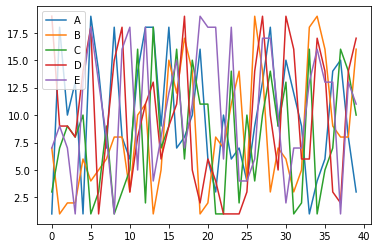

In [143]:
df.plot(kind='line')

<AxesSubplot:>

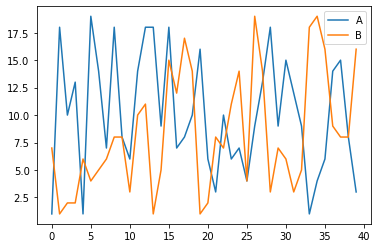

In [144]:
df[['A','B']].plot(kind='line')

In [145]:
# Bar Plot
df.head()

,A,B,C,D,E
0,1,7,3,19,7
1,18,1,7,9,9
2,10,2,9,9,7
3,13,2,8,8,1
4,1,6,10,14,13
